## Dataset

In [1]:

import imageio
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable


In [2]:



np.random.seed(45)
num_samples = 40
    

x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps


def equation(x, theta_0, theta_1):
    return theta_1 * x  + theta_0


def loss_fn(y_pred, y):
    return ((y-y_pred)**2).mean()



### Question [1 mark]

**Use `torch.autograd` to find the true gradient on the given dataset using linear regression in the form:**

$
\hat{y} = \theta_1 x + \theta_0 $

for any given values of $ \theta_0 $ and $ \theta_1 $.

You must compute the gradients of the **mean squared error (MSE)** loss with respect to \( \theta_0 \) and \( \theta_1 \), using PyTorch's automatic differentiation (`autograd`).


In [3]:
x1_tensor = torch.tensor(x1, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)

# Prediction
y_hat = equation(x1_tensor, theta_0, theta_1)

# Mean Squared Error Loss
loss = loss_fn(y_hat, y_tensor)

# Backward pass to compute gradients
loss.backward()


print("Gradient w.r.t. theta_0:", theta_0.grad.item())
print("Gradient w.r.t. theta_1:", theta_1.grad.item())
print("Loss:", loss.item())


Gradient w.r.t. theta_0: -5.616434097290039
Gradient w.r.t. theta_1: -0.5629974603652954
Loss: 9.355592727661133


### Question [1 mark]

**Using the same $ (\theta_0, \theta_1) $ as above, calculate the stochastic gradient for all points in the dataset.**

For each data point $ (x_i, y_i) $:

1. Compute the gradient of the **squared loss** individually:
   $
   L_i = (\theta_1 x_i + \theta_0 - y_i)^2
   $
2. Use `torch.autograd` to compute the gradient of $ L_i $ w.r.t. $ \theta_0 $ and $ \theta_1 $ for each $ i $.
3. Take the **average of all these gradients**.

Finally, compare this **average stochastic gradient** with the **true gradient** (from the previous question) to show that stochastic gradient is a good estimate of the full gradient.


In [4]:
def stochastic_gradient_descent(x1_tensor, y_tensor, theta_0, theta_1):
    gradients_theta_0 = []
    gradients_theta_1 = []
    
    for i in range(len(x1_tensor)):
    
        theta_0_copy = Variable(theta_0.data.clone(), requires_grad=True)
        theta_1_copy = Variable(theta_1.data.clone(), requires_grad=True)

        x_i = x1_tensor[i]
        y_i = y_tensor[i]
        

        y_hat_i = equation(x_i, theta_0_copy, theta_1_copy)
        
        loss_i = loss_fn(y_hat_i, y_i)
    
        loss_i.backward()
    
        gradients_theta_0.append(theta_0_copy.grad.item())
        gradients_theta_1.append(theta_1_copy.grad.item())
  
    avg_grad_theta_0 = np.mean(gradients_theta_0)
    avg_grad_theta_1 = np.mean(gradients_theta_1)

    return avg_grad_theta_0, avg_grad_theta_1



avg_grad_theta_0, avg_grad_theta_1 = stochastic_gradient_descent(x1_tensor, y_tensor, theta_0, theta_1)
print("Stochastic Gradient Descent:")
print(f"Average Gradient w.r.t. theta_0: {avg_grad_theta_0}, theta_1: {avg_grad_theta_1}")


Stochastic Gradient Descent:
Average Gradient w.r.t. theta_0: -5.616434770822525, theta_1: -0.5629974469542504


## Gradient Descent Optimization Comparison


Implement the following gradient descent methods:

- **Full-Batch Gradient Descent**
- **Mini-Batch Gradient Descent**
- **Stochastic Gradient Descent (SGD)**

### Objective

1. **Calculate the average number of iterations** required for each method to get sufficiently close to the optimal solution.

2. A solution is considered *sufficiently close* when the loss is within an $ \epsilon $-neighborhood of the minimum value of the loss function:

   $$
   |L(\theta) - L_{\text{min}}| < \epsilon
   $$

3. Use:
   - $ \epsilon = 0.001 $ as the convergence threshold.
   - Run the convergence process for **15 epochs**.

### Visualizations

- **Loss vs Epochs Plot** for all three optimization methods.
- **Contour plots** showing optimization paths for selected epochs.
- Optionally, create an **animation or GIF** to show the optimization process dynamically.

### Analysis

Answer the following:

- Which optimization process takes a **larger number of iterations/epochs** to converge?
- **Why** does this method converge slower than others?



**[2 Marks]**


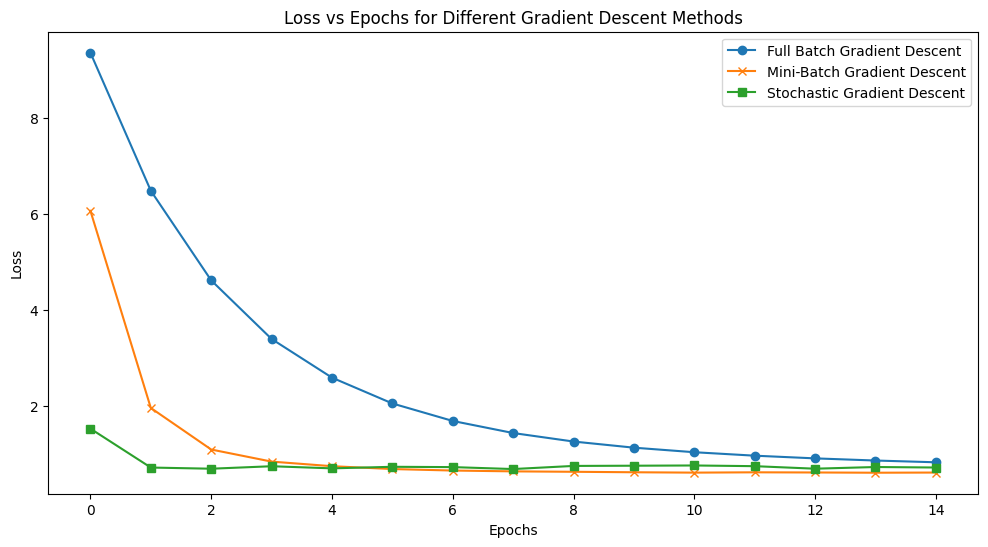

In [5]:
def batch_gradient_descent(x1_tensor, y_tensor, theta_0, theta_1, lr, batch_size, num_epochs, epsilon=0.001):
    losses = []
    theta_0s = []
    theta_1s = []


    for epoch in range(num_epochs):
        total_loss = 0.0


        # Shuffle the data
      
        indices = torch.randperm(len(x1_tensor))
        x1_tensor = x1_tensor[indices]
        y_tensor = y_tensor[indices]

        for i in range(0, len(x1_tensor), batch_size):
            x_batch = x1_tensor[i:i+batch_size]
            y_batch = y_tensor[i:i+batch_size]

            theta_0.grad = None
            theta_1.grad = None
            y_hat_batch = equation(x_batch, theta_0, theta_1)
            loss = loss_fn(y_hat_batch, y_batch)
            loss.backward()

            theta_0s.append(theta_0.item())
            theta_1s.append(theta_1.item())

            with torch.no_grad():
                theta_0 -= lr * theta_0.grad
                theta_1 -= lr * theta_1.grad
        
            total_loss += loss.item()
        
        avg_loss = total_loss / (len(x1_tensor) // batch_size)
        losses.append(avg_loss)
        if avg_loss < epsilon:
            print(f"Converged at epoch {epoch+1} with loss {total_loss}")
            break
        

    return losses, theta_0s, theta_1s


# Full Batch Gradient Descent
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
lr = 0.1
batch_size = 40
num_epochs = 15
losses_full_batch, theta_0s_full, theta_1s_full = batch_gradient_descent(
    x1_tensor, y_tensor, theta_0, theta_1, lr, batch_size, num_epochs
)

# Mini-Batch Gradient Descent
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
batch_size = 10
lr = 0.1
num_epochs = 15
losses_mini_batch, theta_0s_mini, theta_1s_mini = batch_gradient_descent(
    x1_tensor, y_tensor, theta_0, theta_1, lr, batch_size, num_epochs
)

# Stochastic Gradient Descent
theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
lr = 0.1
batch_size = 1
num_epochs = 15
losses_stochastic, theta_0s_stochastic, theta_1s_stochastic = batch_gradient_descent(
    x1_tensor, y_tensor, theta_0, theta_1, lr, batch_size, num_epochs
)


# Plotting the losses
plt.figure(figsize=(12, 6)) 
plt.plot(losses_full_batch, label='Full Batch Gradient Descent', marker='o')
plt.plot(losses_mini_batch, label='Mini-Batch Gradient Descent', marker='x')
plt.plot(losses_stochastic, label='Stochastic Gradient Descent', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Gradient Descent Methods')
plt.legend()


            




#### Calculating the Optimal theta

In [6]:
X_matrix = np.vstack((x1, np.ones_like(x1))).T
theta_optimal = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y
print(f"Optimal theta_0: {theta_optimal[1]}, theta_1: {theta_optimal[0]}")

y_predected = equation(x1_tensor, theta_optimal[1], theta_optimal[0])

optimum_loss = loss_fn(y_predected, y_tensor)
print(f"Optimal Loss: {optimum_loss.item()}")


Optimal theta_0: 3.9507064023194527, theta_1: 2.6824689259670595
Optimal Loss: 0.5957542657852173


### Contour Plot

In [7]:
def plot_contour_trajectory(x_tensor, y_tensor, theta_0s, theta_1s, equation, loss_fn, title='Contour Plot'):
  
    theta_0_grid = np.linspace(min(theta_0s) - 1, max(theta_0s) + 1, 100)
    theta_1_grid = np.linspace(min(theta_1s) - 1, max(theta_1s) + 1, 100)
    theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_grid, theta_1_grid)


    loss_grid = np.zeros_like(theta_0_mesh)
    for i in range(theta_0_mesh.shape[0]):
        for j in range(theta_0_mesh.shape[1]):
            theta_0_val = theta_0_mesh[i, j]
            theta_1_val = theta_1_mesh[i, j]
            y_hat = equation(x_tensor, theta_0_val, theta_1_val)
            loss_grid[i, j] = loss_fn(y_hat, y_tensor).item()

  
    plt.figure(figsize=(8, 6))
    plt.contourf(theta_0_mesh, theta_1_mesh, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(label='Loss')

    plt.plot(theta_0s, theta_1s, color='red', marker='o', markersize=5, label='Trajectory')
    plt.scatter(theta_0s[0], theta_1s[0], color='blue', s=50, label='Start')
    plt.scatter(theta_0s[-1], theta_1s[-1], color='green', s=50, label='End')

    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


In [8]:

def save_contour_plot_as_gif(x_tensor, y_tensor, theta_0s, theta_1s, equation, loss_fn, filename='contour_plot.gif'):
    
    images = []
    
    theta_0_grid = np.linspace(min(theta_0s) - 1, max(theta_0s) + 1, 100)
    theta_1_grid = np.linspace(min(theta_1s) - 1, max(theta_1s) + 1, 100)
    theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_grid, theta_1_grid)

    for i in range(len(theta_0s)):
        loss_grid = np.zeros_like(theta_0_mesh)
        for j in range(theta_0_mesh.shape[0]):
            for k in range(theta_0_mesh.shape[1]):
                theta_0_val = theta_0_mesh[j, k]
                theta_1_val = theta_1_mesh[j, k]
                y_hat = equation(x_tensor, theta_0_val, theta_1_val)
                loss_grid[j, k] = loss_fn(y_hat, y_tensor).item()

        plt.figure(figsize=(8, 6))
        plt.contourf(theta_0_mesh, theta_1_mesh, loss_grid, levels=50, cmap='viridis')
        plt.colorbar(label='Loss')

        plt.plot(theta_0s[:i+1], theta_1s[:i+1], color='red', marker='o', markersize=5)
        plt.scatter(theta_0s[0], theta_1s[0], color='blue', s=50, label='Start')
        plt.scatter(theta_0s[-1], theta_1s[-1], color='green', s=50, label='End')
        plt.scatter(theta_0s[0], theta_1s[0], color='blue', s=50)
        plt.scatter(theta_0s[i], theta_1s[i], color='green', s=50)

        plt.xlabel('Theta 0')
        plt.ylabel('Theta 1')
        plt.title('Contour Plot with Trajectory')
        plt.grid(True)

        # Save the current plot to a temporary file
        filename_temp = f'temp_{i}.png'
        plt.savefig(filename_temp)
        plt.close()
        
        # Append the image to the list
        images.append(imageio.imread(filename_temp))

    # Save all images as a GIF
    imageio.mimsave(filename, images, duration=0.5)

### Full-Batch Gradient Descent

Epoch of convergence: 584 with loss 0.5967432260513306
**************************************************
At convergence theta_0 : 3.943800687789917, theta_1: 2.6259942054748535
**************************************************
Final theta values after 1000 epochs: 3.9501681327819824, 2.6780571937561035
Epoch 1: Loss = 9.355592727661133
Epoch 41: Loss = 2.830509901046753
Epoch 81: Loss = 1.353005290031433
Epoch 121: Loss = 0.940097987651825
Epoch 161: Loss = 0.7833143472671509
Epoch 201: Loss = 0.7060651183128357
Epoch 241: Loss = 0.6624215245246887
Epoch 281: Loss = 0.6364094018936157
Epoch 321: Loss = 0.6206187009811401
Epoch 361: Loss = 0.6109752655029297
Epoch 401: Loss = 0.6050747632980347
Epoch 441: Loss = 0.601462185382843
Epoch 481: Loss = 0.5992497801780701
Epoch 521: Loss = 0.5978949666023254
Epoch 561: Loss = 0.5970652103424072
Epoch 601: Loss = 0.596557080745697
Epoch 641: Loss = 0.5962458848953247
Epoch 681: Loss = 0.596055269241333
Epoch 721: Loss = 0.5959385633468628
Ep

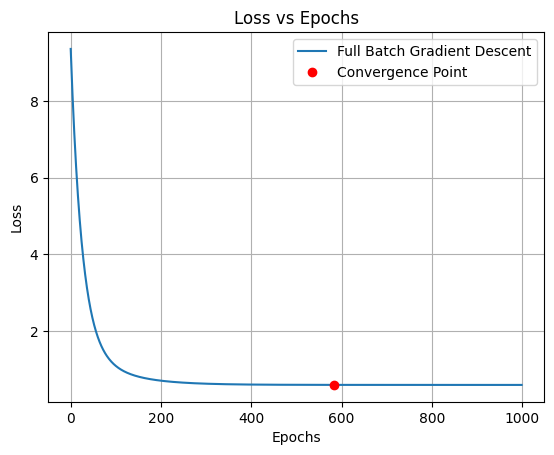

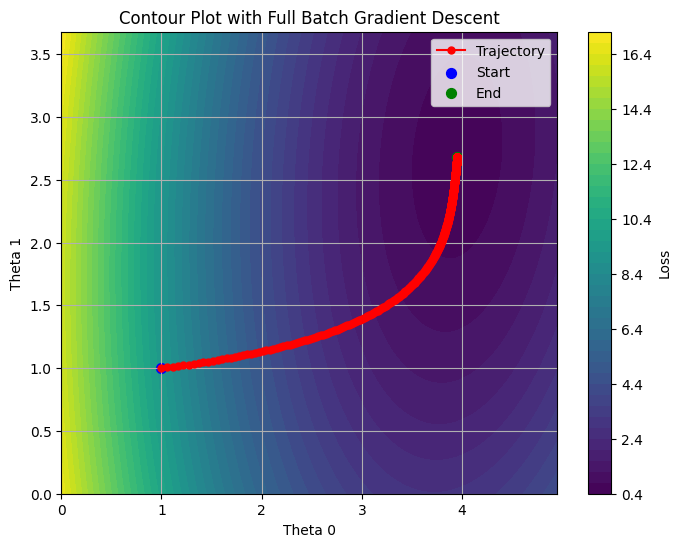

In [9]:
def full_batch_gradient_descent(x1_tensor, y_tensor, theta_0, theta_1, lr, num_epochs, optimum_loss, epsilon=0.001):
    losses = []
    theta_0s = []
    theta_1s = []
    epoch_of_first_convergence = None


    for epoch in range(num_epochs):
        theta_0.grad = None
        theta_1.grad = None
        
        y_hat = equation(x1_tensor, theta_0, theta_1)
        loss = loss_fn(y_hat, y_tensor)
        
        loss.backward()
        
        theta_0s.append(theta_0.item())
        theta_1s.append(theta_1.item())
        
        with torch.no_grad():
            theta_0 -= lr * theta_0.grad
            theta_1 -= lr * theta_1.grad
        
        losses.append(loss.item())

  
        if epoch_of_first_convergence is None and loss.item() - float(optimum_loss) <= epsilon:
            epoch_of_first_convergence = epoch + 1

    return losses, theta_0s, theta_1s, epoch_of_first_convergence


theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)  
lr = 0.01
num_epochs = 1000
losses_full_batch, theta_0s_full, theta_1s_full, epoch_of_convergence = full_batch_gradient_descent(
    x1_tensor, y_tensor, theta_0, theta_1, lr, num_epochs, optimum_loss
)


print(f"Epoch of convergence: {epoch_of_convergence} with loss {losses_full_batch[epoch_of_convergence - 1]}")
print("*" * 50)
print(f"At convergence theta_0 : {theta_0s_full[epoch_of_convergence - 1]}, theta_1: {theta_1s_full[epoch_of_convergence - 1]}")
print("*" * 50)

print(f"Final theta values after 1000 epochs: {theta_0s_full[-1]}, {theta_1s_full[-1]}")

for i in list(range(0, len(losses_full_batch), 40)) + [len(losses_full_batch) - 1]:
    print(f"Epoch {i+1}: Loss = {losses_full_batch[i]}")


plt.plot(losses_full_batch, label='Full Batch Gradient Descent')
plt.plot(epoch_of_convergence - 1, losses_full_batch[epoch_of_convergence - 1],'ro', label='Convergence Point')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.show()


plot_contour_trajectory(
    x1_tensor, y_tensor, theta_0s_full, theta_1s_full,
    equation, loss_fn, title='Contour Plot with Full Batch Gradient Descent'
)


# save_contour_plot_as_gif(
#     x1_tensor, y_tensor, theta_0s_full, theta_1s_full,
#     equation, loss_fn, filename='full_batch_gradient_descent_contour.gif'
# )


### Mini-Batch Gradient Descent


Epoch of convergence (Mini-Batch): 117 with loss 0.596718589256865
**************************************************
Total Number of iterations (Mini-Batch): 936
**************************************************
At convergence (Mini-Batch) theta_0 : 3.9422152042388916, theta_1: 2.626990556716919
**************************************************
Final theta values after 1000 epochs (Mini-Batch): 3.951136589050293, 2.6823313236236572
Epoch 1: Loss = 7.894242512248456
Epoch 41: Loss = 0.6987836115324171
Epoch 81: Loss = 0.6044855302723591
Epoch 121: Loss = 0.5965040496840401
Epoch 161: Loss = 0.5958190420671599
Epoch 201: Loss = 0.5957595671963645
Epoch 241: Loss = 0.5957555394037627
Epoch 281: Loss = 0.5957542075309903
Epoch 321: Loss = 0.5957554045147845
Epoch 361: Loss = 0.5957553834334248
Epoch 401: Loss = 0.5957545425408171
Epoch 441: Loss = 0.5957541903830134
Epoch 481: Loss = 0.5957554009975865
Epoch 500: Loss = 0.5957543533018906


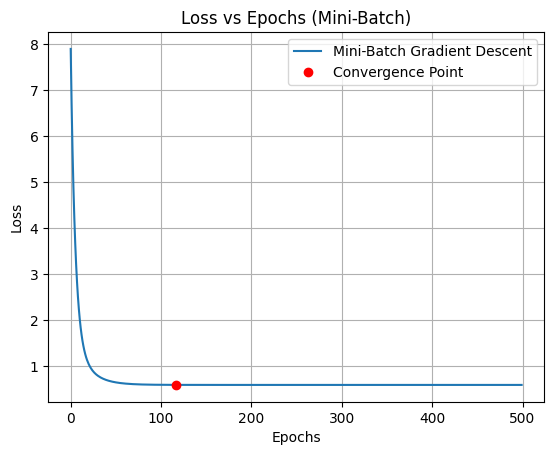

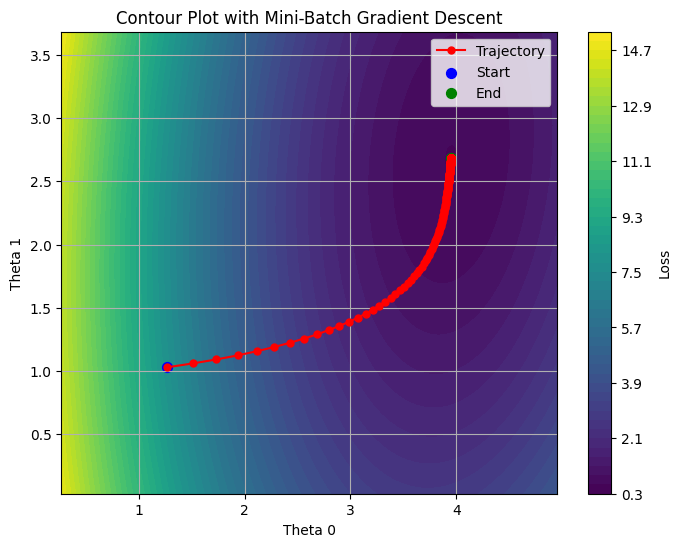

In [10]:
def mini_batch_gardient_descent(x1_tensor, y_tensor, theta_0, theta_1, lr, batch_size, num_epochs, optimum_loss, epsilon=0.001):
    losses = []
    theta_0s = []
    theta_1s = []
    epoch_of_convergence = None

    for epoch in range(num_epochs):
        total_loss = 0.0
        indices = torch.randperm(len(x1_tensor))
        x1_tensor = x1_tensor[indices]
        y_tensor = y_tensor[indices]

        for i in range(0, len(x1_tensor), batch_size):
            x_batch = x1_tensor[i:i+batch_size]
            y_batch = y_tensor[i:i+batch_size]

            theta_0.grad = None
            theta_1.grad = None
            
            y_hat_batch = equation(x_batch, theta_0, theta_1)
            loss = loss_fn(y_hat_batch, y_batch)
            loss.backward()

            
            with torch.no_grad():
                theta_0 -= lr * theta_0.grad
                theta_1 -= lr * theta_1.grad
            
        for i in range(len(x1_tensor)):
            y_hat_i = equation(x1_tensor[i], theta_0, theta_1)
            loss_i = loss_fn(y_hat_i, y_tensor[i])
            total_loss += loss_i.item()
        
        avg_loss = total_loss / (len(x1_tensor))
        losses.append(avg_loss)
        theta_0s.append(theta_0.item())
        theta_1s.append(theta_1.item())

        if epoch_of_convergence is None and avg_loss - float(optimum_loss) <= epsilon:
            epoch_of_convergence = epoch + 1

    return losses, theta_0s, theta_1s, epoch_of_convergence

theta_0 = torch.tensor(1.0,  requires_grad=True)
theta_1 = torch.tensor(1.0,  requires_grad=True)
batch_size = 8
lr = 0.01
num_epochs = 500
losses_mini_batch, theta_0s_mini, theta_1s_mini, epoch_of_convergence = mini_batch_gardient_descent(x1_tensor, y_tensor, theta_0, theta_1, lr, batch_size, num_epochs, optimum_loss)
print(f"Epoch of convergence (Mini-Batch): {epoch_of_convergence} with loss {losses_mini_batch[epoch_of_convergence - 1]}")
print("*" * 50)
print(f"Total Number of iterations (Mini-Batch): {epoch_of_convergence * batch_size}")
print("*" * 50)
print(f"At convergence (Mini-Batch) theta_0 : {theta_0s_mini[epoch_of_convergence - 1]}, theta_1: {theta_1s_mini[epoch_of_convergence - 1]}")
print("*" * 50)
print(f"Final theta values after 1000 epochs (Mini-Batch): {theta_0s_mini[-1]}, {theta_1s_mini[-1]}")

for i in list(range(0, len(losses_mini_batch), 40)) + [len(losses_mini_batch) - 1]:
    print(f"Epoch {i+1}: Loss = {losses_mini_batch[i]}")


plt.plot(losses_mini_batch, label='Mini-Batch Gradient Descent')
plt.plot(epoch_of_convergence - 1, losses_mini_batch[epoch_of_convergence - 1],'ro', label='Convergence Point')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Mini-Batch)')
plt.legend()
plt.grid(True)
plt.show()


plot_contour_trajectory(
    x1_tensor, y_tensor, theta_0s_mini, theta_1s_mini,
    equation, loss_fn, title='Contour Plot with Mini-Batch Gradient Descent'
)

# save_contour_plot_as_gif(
#     x1_tensor, y_tensor, theta_0s_mini, theta_1s_mini,
#     equation, loss_fn, filename='mini_batch_gradient_descent_contour.gif'
# )






Epoch of convergence (Stochastic): 17 with loss 0.5964634852833115
**************************************************
Total Number of iterations (Stochastic): 680
**************************************************
After 50 epochs theta_0 : 3.9287734031677246, theta_1: 2.64906907081604
**************************************************
Final theta values after 500 epochs (Stochastic): 3.950101613998413, 2.675994396209717
Epoch 1: Loss = 2.8746541931061076
Epoch 3: Loss = 0.9414923801959958
Epoch 5: Loss = 0.6954363044729689
Epoch 7: Loss = 0.6308256065556634
Epoch 9: Loss = 0.6092966085503576
Epoch 11: Loss = 0.6003138083266094
Epoch 13: Loss = 0.598755926152944
Epoch 15: Loss = 0.5970730681234272
Epoch 17: Loss = 0.5964634852833115
Epoch 19: Loss = 0.59643178457045
Epoch 21: Loss = 0.5961622306815115
Epoch 23: Loss = 0.5959990023693535
Epoch 25: Loss = 0.5965819061850197
Epoch 27: Loss = 0.595855244310951
Epoch 29: Loss = 0.5961564981611446
Epoch 31: Loss = 0.5957653982157354
Epoch 33:

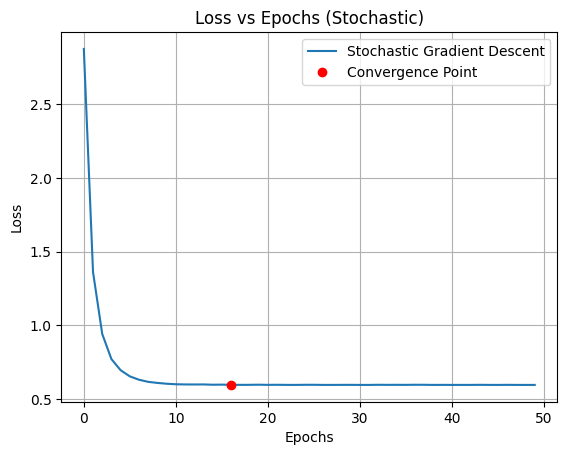

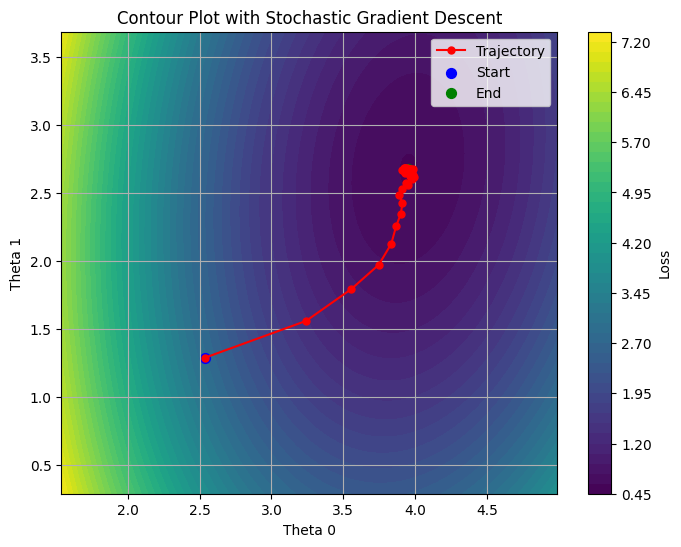

In [11]:
def stochastic_gradient_descent(x1_tensor, y_tensor, theta_0, theta_1, lr, num_epochs, optimum_loss, epsilon=0.001):
    losses = []
    theta_0s = []
    theta_1s = []
    epoch_of_convergence = None

    for epoch in range(num_epochs):
        total_loss = 0.0
        indices = torch.randperm(len(x1_tensor))
        x1_tensor = x1_tensor[indices]
        y_tensor = y_tensor[indices]

        for i in range(len(x1_tensor)):
            x_i = x1_tensor[i:i+1]
            y_i = y_tensor[i:i+1]

            theta_0.grad = None
            theta_1.grad = None
            
            y_hat_i = equation(x_i, theta_0, theta_1)
            loss = loss_fn(y_hat_i, y_i)
            loss.backward()

            
            with torch.no_grad():
                theta_0 -= lr * theta_0.grad
                theta_1 -= lr * theta_1.grad
            
        for i in range(len(x1_tensor)):
            y_hat_i = equation(x1_tensor[i:i+1], theta_0, theta_1)
            loss_i = loss_fn(y_hat_i, y_tensor[i:i+1])
            total_loss += loss_i.item()
        avg_loss = total_loss / len(x1_tensor)
        losses.append(avg_loss)
        
        
        theta_0s.append(theta_0.item())
        theta_1s.append(theta_1.item())

        if epoch_of_convergence is None and (avg_loss - optimum_loss) <= epsilon:
            epoch_of_convergence = epoch + 1

    return losses, theta_0s, theta_1s, epoch_of_convergence

theta_0 = torch.tensor(1.0,  requires_grad=True)
theta_1 = torch.tensor(1.0,  requires_grad=True)
lr = 0.01
num_epochs = 50
losses_stochastic, theta_0s_stochastic, theta_1s_stochastic, epoch_of_convergence = stochastic_gradient_descent(
    x1_tensor, y_tensor, theta_0, theta_1, lr, num_epochs, optimum_loss
)

print(f"Epoch of convergence (Stochastic): {epoch_of_convergence} with loss {losses_stochastic[epoch_of_convergence - 1]}")
print("*" * 50)
print(f"Total Number of iterations (Stochastic): {epoch_of_convergence * len(x1_tensor)}")
print("*" * 50)
print(f"After 50 epochs theta_0 : {theta_0s_stochastic[epoch_of_convergence - 1]}, theta_1: {theta_1s_stochastic[epoch_of_convergence - 1]}")
print("*" * 50)
print(f"Final theta values after 500 epochs (Stochastic): {theta_0s_stochastic[-1]}, {theta_1s_stochastic[-1]}")
for i in list(range(0, len(losses_stochastic), 2)) + [len(losses_stochastic) - 1]:
    print(f"Epoch {i+1}: Loss = {losses_stochastic[i]}")


plt.plot(losses_stochastic, label='Stochastic Gradient Descent')
plt.plot(epoch_of_convergence - 1, losses_stochastic[epoch_of_convergence - 1],'ro', label='Convergence Point')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Stochastic)')
plt.legend()
plt.grid(True)
plt.show()


plot_contour_trajectory(
    x1_tensor, y_tensor, theta_0s_stochastic, theta_1s_stochastic,
    equation, loss_fn, title='Contour Plot with Stochastic Gradient Descent'
)

# save_contour_plot_as_gif(
#     x1_tensor, y_tensor, theta_0s_stochastic, theta_1s_stochastic,
#     equation, loss_fn, filename='stochastic_gradient_descent_contour.gif'
# )


### Full-batch gradient descent with momentum implementation

,Loss,Theta_0,Theta_1,Velocity_Theta_0,Velocity_Theta_1,Theta_0_Grad,Theta_1_Grad
Epoch,,,,,,,
1,9.355593,1.056164,1.005630,-0.056164,-0.005630,-5.616434,-0.562997
2,9.040090,1.161763,1.016387,-0.105598,-0.010757,-5.505059,-0.568954
3,8.463640,1.309758,1.031868,-0.147995,-0.015481,-5.295685,-0.580046
4,7.692513,1.492977,1.051754,-0.183219,-0.019887,-5.002316,-0.595334
5,6.797231,1.704267,1.075790,-0.211290,-0.024036,-4.639246,-0.613806
...,...,...,...,...,...,...,...
96,0.596133,3.932267,2.677953,-0.001242,0.000778,-0.038729,0.000973
97,0.596087,3.933746,2.677250,-0.001479,0.000703,-0.036114,0.000271
98,0.596035,3.935407,2.676621,-0.001661,0.000629,-0.033038,-0.000424


Epoch of convergence (Full Batch with Momentum): 38 with loss 0.5958859920501709
**************************************************
At convergence (Full Batch with Momentum) theta_0 : 3.8904776573181152, theta_1: 2.705686569213867
**************************************************
Final theta values after 100 epochs (Full Batch with Momentum): 3.9390690326690674, 2.675584554672241
Epoch 1: Loss = 9.355592727661133
Epoch 11: Loss = 2.002791404724121
Epoch 21: Loss = 1.3537094593048096
Epoch 31: Loss = 0.8347181081771851
Epoch 41: Loss = 0.6182348728179932
Epoch 51: Loss = 0.6412407159805298
Epoch 61: Loss = 0.599384069442749
Epoch 71: Loss = 0.6018251776695251
Epoch 81: Loss = 0.5961524844169617
Epoch 91: Loss = 0.5961765646934509
Epoch 100: Loss = 0.5959349274635315


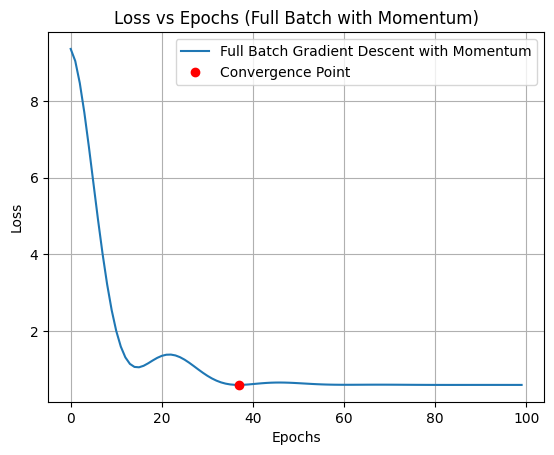

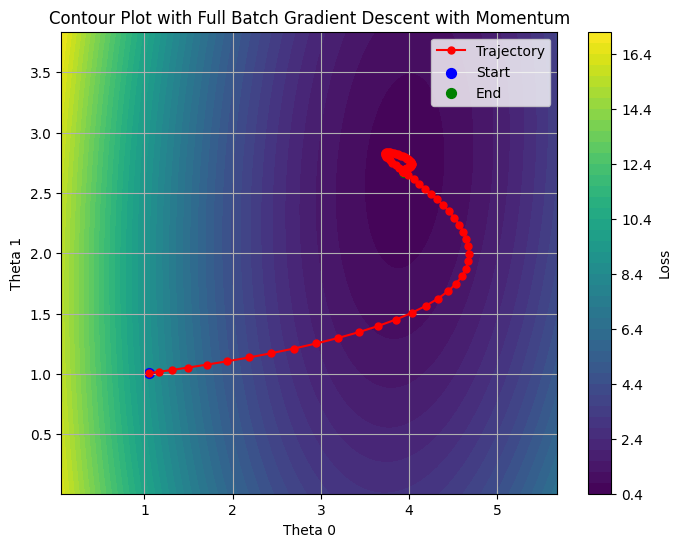

In [12]:
def full_batch_gradient_descent_with_momentum(x1_tensor, y_tensor, theta_0, theta_1, lr, num_epochs, momentum=0.9, optimum_loss=None, epsilon=0.001):
    losses = []
    theta_0s = []
    theta_1s = []
    v_theta_0 = []
    v_theta_1 = []
    theta_0_grad = []
    theta_1_grad = []
    epoch_of_convergence = None

    change_theta_0 = 0.0
    change_theta_1 = 0.0

    for epoch in range(num_epochs):
        theta_0.grad = None
        theta_1.grad = None
        
        y_hat = equation(x1_tensor, theta_0, theta_1)
        loss = loss_fn(y_hat, y_tensor)
        
        loss.backward()
        
        change_theta_0 = momentum * change_theta_0 + lr * theta_0.grad
        change_theta_1 = momentum * change_theta_1 + lr * theta_1.grad
        
        with torch.no_grad():
            theta_0 -= change_theta_0
            theta_1 -= change_theta_1
        
        losses.append(loss.item())
        theta_0s.append(theta_0.item())
        theta_1s.append(theta_1.item())
        v_theta_0.append(change_theta_0.item())
        v_theta_1.append(change_theta_1.item())
        theta_0_grad.append(theta_0.grad.item())
        theta_1_grad.append(theta_1.grad.item())

        if epoch_of_convergence is None and (loss.item() - float(optimum_loss) <= epsilon):
            epoch_of_convergence = epoch + 1

    return losses, theta_0s, theta_1s, v_theta_0, v_theta_1, theta_0_grad, theta_1_grad, epoch_of_convergence

theta_0 = Variable(torch.tensor(1.0), requires_grad=True)
theta_1 = Variable(torch.tensor(1.0), requires_grad=True)
lr = 0.01
num_epochs = 100
momentum = 0.9
losses_momentum, theta_0s_momentum, theta_1s_momentum, v_theta_0, v_theta_1, theta_0_grad, theta_1_grad, epoch_of_convergence = full_batch_gradient_descent_with_momentum(
    x1_tensor, y_tensor, theta_0, theta_1, lr, num_epochs, momentum, optimum_loss
)


import pandas as pd
df = {
    'Epoch': list(range(1, len(losses_momentum) + 1)),
    'Loss': losses_momentum,
    'Theta_0': theta_0s_momentum,
    'Theta_1': theta_1s_momentum,
    'Velocity_Theta_0': v_theta_0,
    'Velocity_Theta_1': v_theta_1,
    'Theta_0_Grad': theta_0_grad,
    'Theta_1_Grad': theta_1_grad
}
df_momentum = pd.DataFrame(df)

df_momentum.set_index('Epoch', inplace=True)


display(df_momentum)  # Display the first 10 rows of the DataFrame

print(f"Epoch of convergence (Full Batch with Momentum): {epoch_of_convergence} with loss {losses_momentum[epoch_of_convergence - 1]}")
print("*" * 50)
print(f"At convergence (Full Batch with Momentum) theta_0 : {theta_0s_momentum[epoch_of_convergence - 1]}, theta_1: {theta_1s_momentum[epoch_of_convergence - 1]}")
print("*" * 50)
print(f"Final theta values after 100 epochs (Full Batch with Momentum): {theta_0s_momentum[-1]}, {theta_1s_momentum[-1]}")
for i in list(range(0, len(losses_momentum), 10)) + [len(losses_momentum) - 1]:
    print(f"Epoch {i+1}: Loss = {losses_momentum[i]}")

plt.plot(losses_momentum, label='Full Batch Gradient Descent with Momentum')
plt.plot(epoch_of_convergence - 1, losses_momentum[epoch_of_convergence - 1],'ro', label='Convergence Point')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Full Batch with Momentum)')
plt.legend()
plt.grid(True)
plt.show()


plot_contour_trajectory(
    x1_tensor, y_tensor, theta_0s_momentum, theta_1s_momentum,
    equation, loss_fn, title='Contour Plot with Full Batch Gradient Descent with Momentum'
)


# save_contour_plot_as_gif(
#     x1_tensor, y_tensor, theta_0s_momentum, theta_1s_momentum,
#     equation, loss_fn, filename='full_batch_gradient_descent_with_momentum_contour.gif'
# )


In [16]:
def plot_contour_trajectory_momentum(x_tensor, y_tensor, theta_0s, theta_1s, equation, loss_fn, theta_0s_toplot, theta_1s_toplot ,title='Contour Plot'):
  
    theta_0_grid = np.linspace(min(theta_0s) - 1, max(theta_0s) + 1, 100)
    theta_1_grid = np.linspace(min(theta_1s) - 1, max(theta_1s) + 1, 100)
    theta_0_mesh, theta_1_mesh = np.meshgrid(theta_0_grid, theta_1_grid)


    loss_grid = np.zeros_like(theta_0_mesh)
    for i in range(theta_0_mesh.shape[0]):
        for j in range(theta_0_mesh.shape[1]):
            theta_0_val = theta_0_mesh[i, j]
            theta_1_val = theta_1_mesh[i, j]
            y_hat = equation(x_tensor, theta_0_val, theta_1_val)
            loss_grid[i, j] = loss_fn(y_hat, y_tensor).item()

    

  
   
    plt.contourf(theta_0_mesh, theta_1_mesh, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(label='Loss')

    plt.plot(theta_0s_toplot, theta_1s_toplot, color='red', marker='o', markersize=5, label='Trajectory')
    plt.scatter(theta_0s[0], theta_1s[0], color='blue', s=50, label='Start')
    plt.scatter(theta_0s[-1], theta_1s[-1], color='green', s=50, label='End')
    plt.xlabel('Theta 0')
    plt.ylabel('Theta 1')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


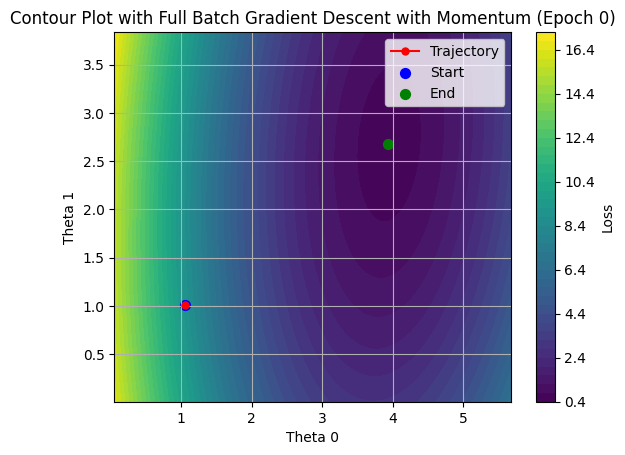

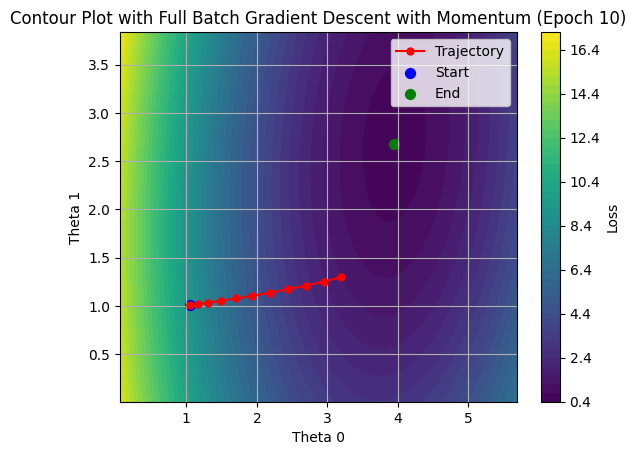

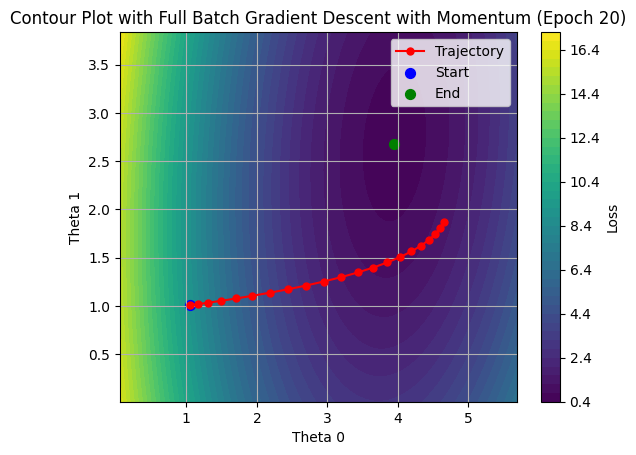

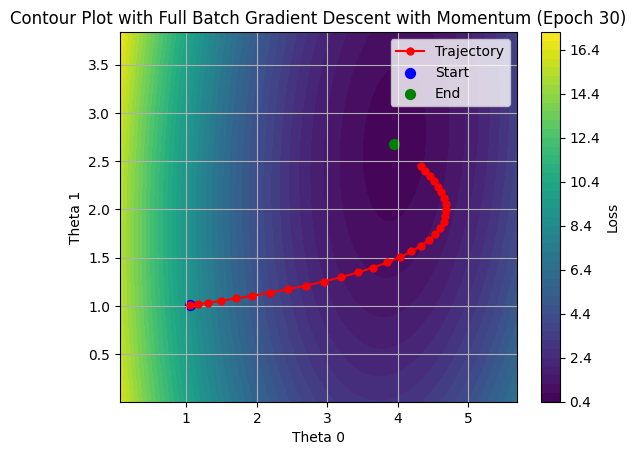

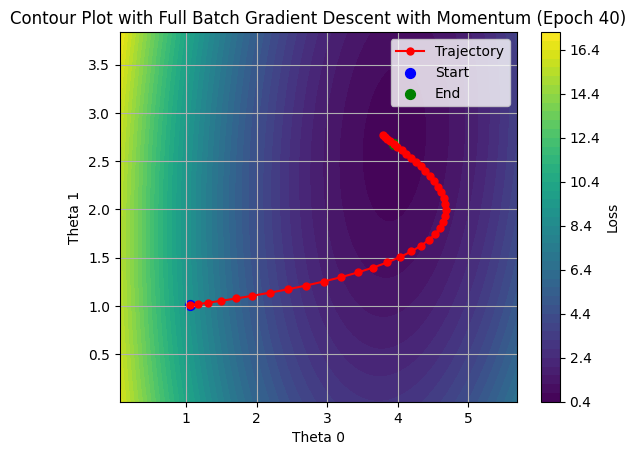

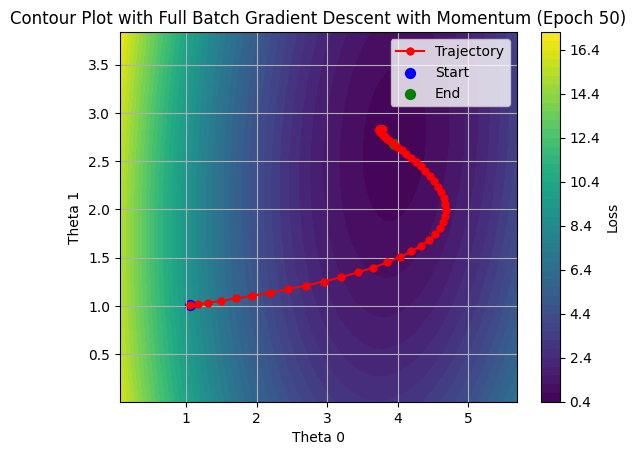

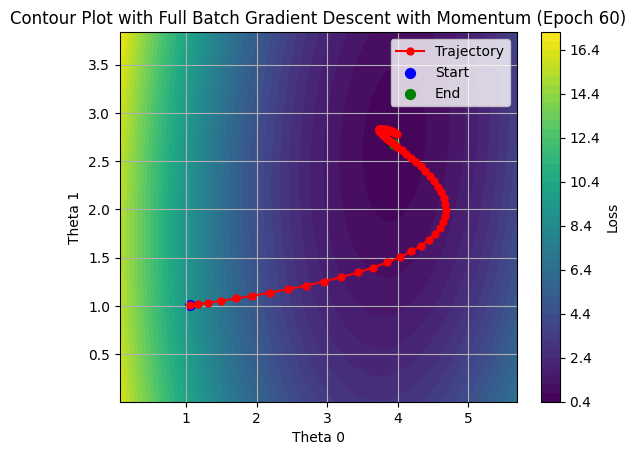

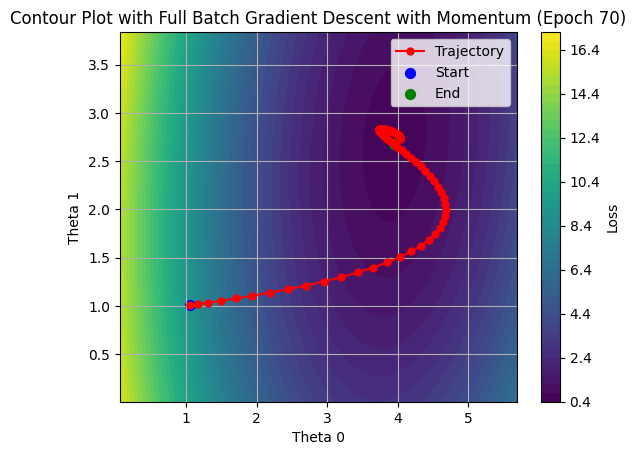

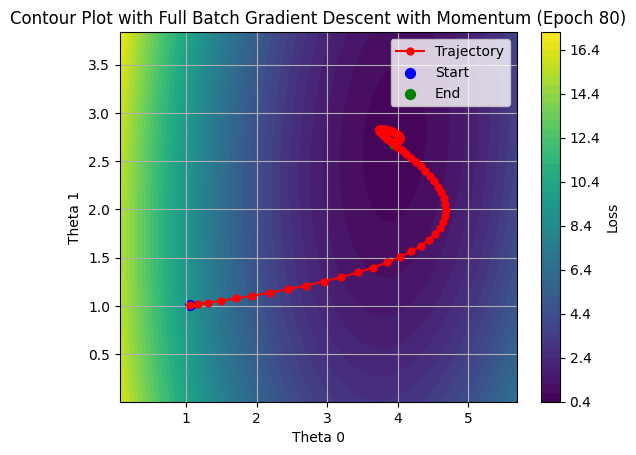

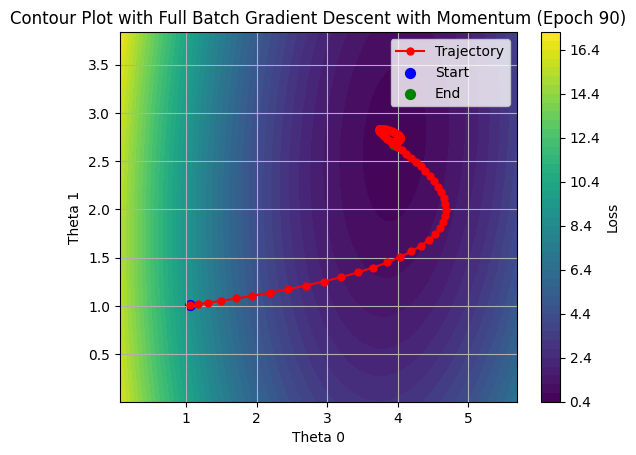

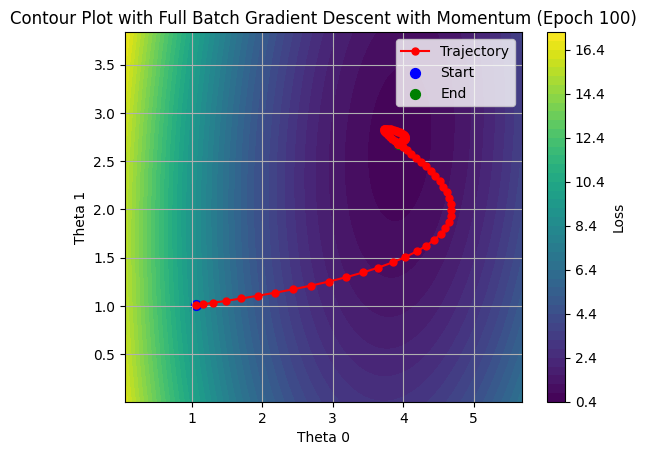

In [17]:
for i in range(0, 101, 10):
    plot_contour_trajectory_momentum(
        x1_tensor, y_tensor, theta_0s_momentum, theta_1s_momentum,
        equation, loss_fn, theta_0s_momentum[:i+1], theta_1s_momentum[:i+1],
        title=f'Contour Plot with Full Batch Gradient Descent with Momentum (Epoch {i})'
    )

### Sochastic gradient descent with momentum implementation

Epoch of convergence (Stochastic with Momentum): 16 with loss 0.5961053517276014
**************************************************
At convergence (Stochastic with Momentum) theta_0 : 3.9477076530456543, theta_1: 2.648740530014038
**************************************************
Final theta values after 50 epochs (Stochastic with Momentum): 3.976691722869873, 2.6878368854522705
Epoch 1: Loss = 3.1304536418872884
Epoch 3: Loss = 0.8891614626845694
Epoch 5: Loss = 0.6894410737615544
Epoch 7: Loss = 0.6334031644078664
Epoch 9: Loss = 0.611054976170999
Epoch 11: Loss = 0.6009869485351373
Epoch 13: Loss = 0.5973198357678484
Epoch 15: Loss = 0.5969380379789072
Epoch 17: Loss = 0.5964524847295252
Epoch 19: Loss = 0.595837457136804
Epoch 21: Loss = 0.5961568116606941
Epoch 23: Loss = 0.5958169074583566
Epoch 25: Loss = 0.5958748758494039
Epoch 27: Loss = 0.5957687731308396
Epoch 29: Loss = 0.5959352197038242
Epoch 31: Loss = 0.5958390917861834
Epoch 33: Loss = 0.5957623854104895
Epoch 35: Lo

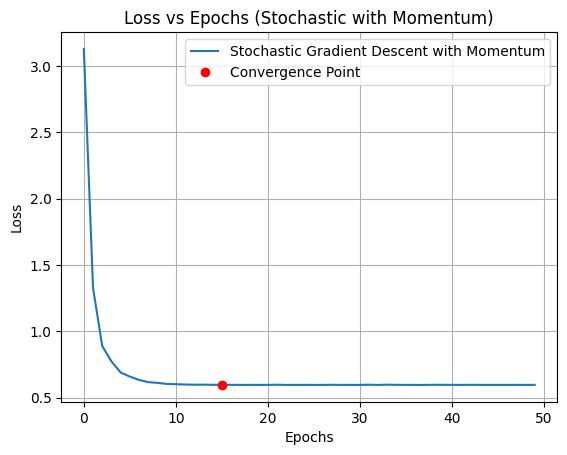

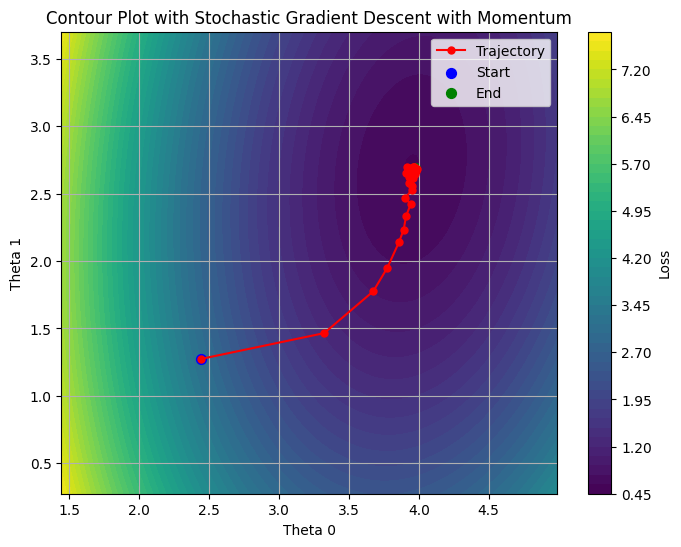

C:\Users\borat\AppData\Local\Temp\ipykernel_17368\3130464204.py:39: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename_temp))


In [ ]:
def stochastic_gradient_descent_with_momentum(x1_tensor, y_tensor, theta_0, theta_1, lr, num_epochs, momentum=0.6, optimum_loss=None, epsilon=0.001):
    losses = []
    theta_0s = []
    theta_1s = []
    v_theta_0 = []
    v_theta_1 = []

    theta_0_grad = []
    theta_1_grad = []
    epoch_of_convergence = None

    change_theta_0 = 0.0
    change_theta_1 = 0.0

    for epoch in range(num_epochs):
        total_loss = 0.0
        indices = torch.randperm(len(x1_tensor))
        x1_tensor = x1_tensor[indices]
        y_tensor = y_tensor[indices]

        for i in range(len(x1_tensor)):
            x_i = x1_tensor[i:i+1]
            y_i = y_tensor[i:i+1]

            theta_0.grad = None
            theta_1.grad = None
            
            y_hat_i = equation(x_i, theta_0, theta_1)
            loss = loss_fn(y_hat_i, y_i)
            loss.backward()

            
            change_theta_0 = momentum * change_theta_0 + lr * theta_0.grad
            change_theta_1 = momentum * change_theta_1 + lr * theta_1.grad
            
            with torch.no_grad():
                theta_0 -= change_theta_0
                theta_1 -= change_theta_1
            
        for i in range(len(x1_tensor)):
            y_hat_i = equation(x1_tensor[i:i+1], theta_0, theta_1)
            loss_i = loss_fn(y_hat_i, y_tensor[i:i+1])
            total_loss += loss_i.item()
        
        avg_loss = total_loss / len(x1_tensor)
        losses.append(avg_loss)
        
        theta_0s.append(theta_0.item())
        theta_1s.append(theta_1.item())
        v_theta_0.append(change_theta_0.item())
        v_theta_1.append(change_theta_1.item())

        if epoch_of_convergence is None and (avg_loss - float(optimum_loss) <= epsilon):
            epoch_of_convergence = epoch + 1

    return losses, theta_0s, theta_1s, v_theta_0, v_theta_1, epoch_of_convergence



theta_0 = torch.tensor(1.0,  requires_grad=True)
theta_1 = torch.tensor(1.0,  requires_grad=True)
lr = 0.001
num_epochs = 50
losses_stochastic_momentum, theta_0s_stochastic_momentum, theta_1s_stochastic_momentum, v_theta_0_stochastic, v_theta_1_stochastic, epoch_of_convergence = stochastic_gradient_descent_with_momentum(
    x1_tensor, y_tensor, theta_0, theta_1, lr, num_epochs, momentum, optimum_loss
)
print(f"Epoch of convergence (Stochastic with Momentum): {epoch_of_convergence} with loss {losses_stochastic_momentum[epoch_of_convergence - 1]}")

# Plot loss vs epochs
print("*" * 50)
print(f"At convergence (Stochastic with Momentum) theta_0 : {theta_0s_stochastic_momentum[epoch_of_convergence - 1]}, theta_1: {theta_1s_stochastic_momentum[epoch_of_convergence - 1]}")
print("*" * 50)
print(f"Final theta values after 50 epochs (Stochastic with Momentum): {theta_0s_stochastic_momentum[-1]}, {theta_1s_stochastic_momentum[-1]}")
for i in list(range(0, len(losses_stochastic_momentum), 2)) + [len(losses_stochastic_momentum) - 1]:
    print(f"Epoch {i+1}: Loss = {losses_stochastic_momentum[i]}")

plt.plot(losses_stochastic_momentum, label='Stochastic Gradient Descent with Momentum')
plt.plot(epoch_of_convergence - 1, losses_stochastic_momentum[epoch_of_convergence - 1],'ro', label='Convergence Point')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs (Stochastic with Momentum)')
plt.legend()    
plt.grid(True)
plt.show()

plot_contour_trajectory(
    x1_tensor, y_tensor, theta_0s_stochastic_momentum, theta_1s_stochastic_momentum,
    equation, loss_fn, title='Contour Plot with Stochastic Gradient Descent with Momentum'
)



# save_contour_plot_as_gif(
#     x1_tensor, y_tensor, theta_0s_stochastic_momentum, theta_1s_stochastic_momentum,
#     equation, loss_fn, filename='stochastic_gradient_descent_with_momentum_contour.gif'
# )

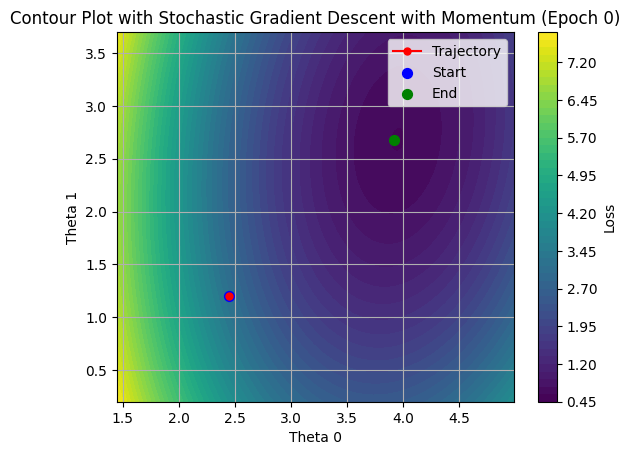

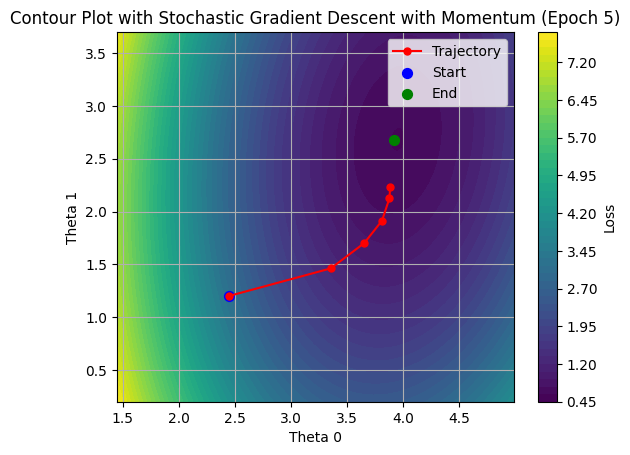

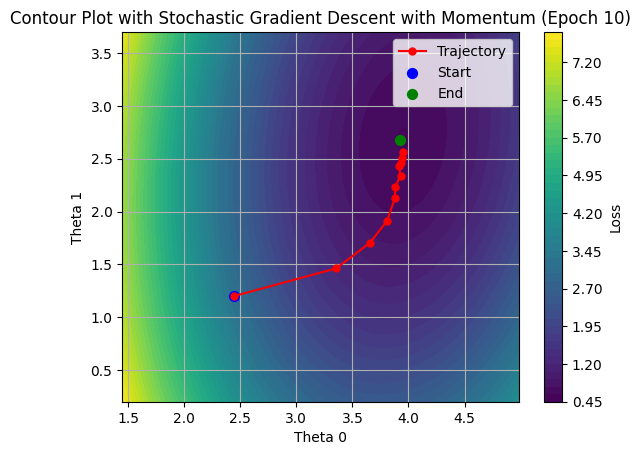

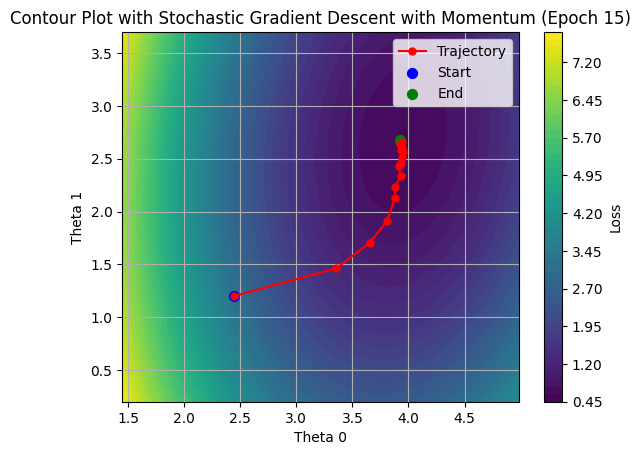

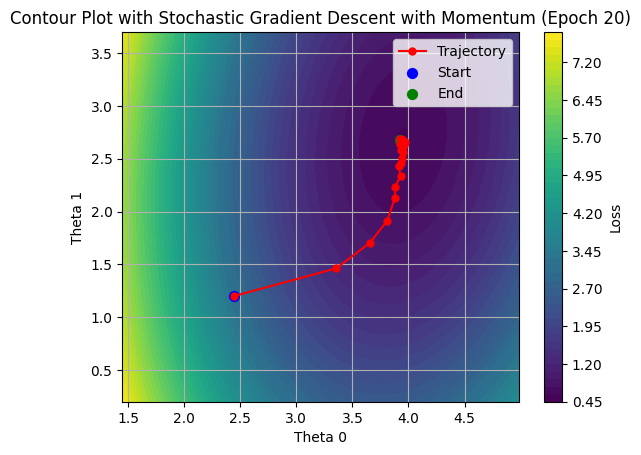

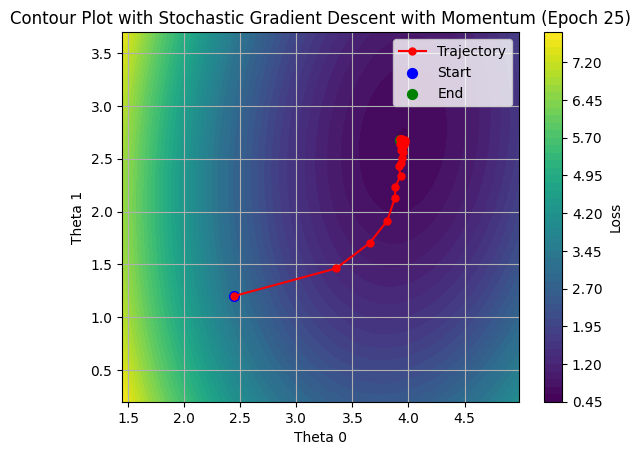

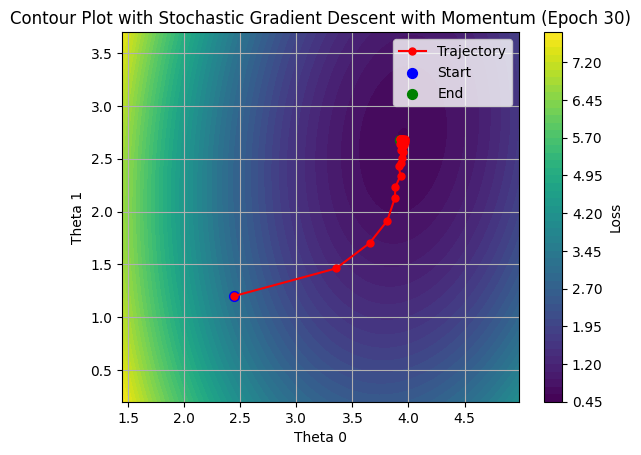

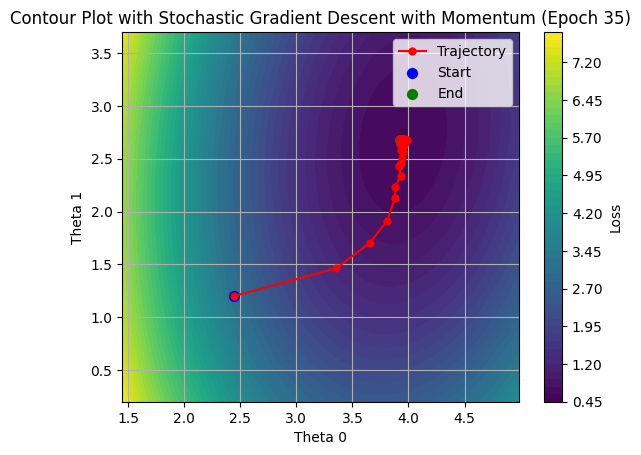

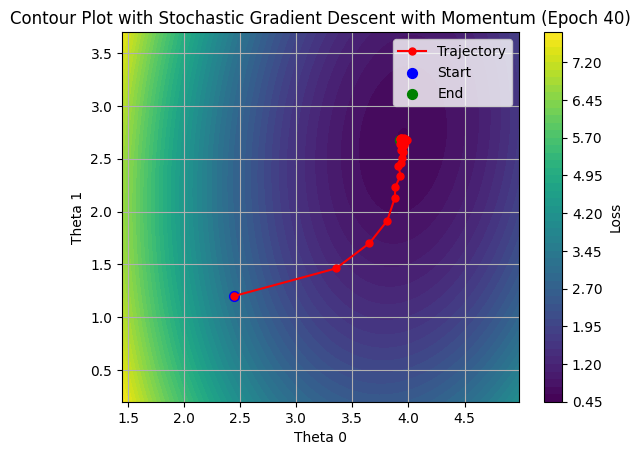

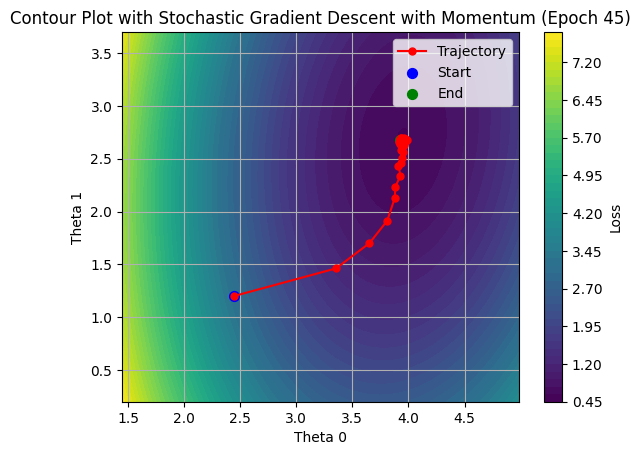

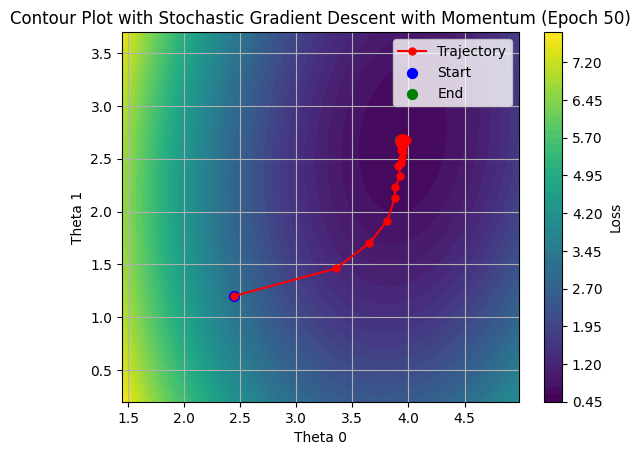

In [19]:
for i in range(0, 51, 5):
    plot_contour_trajectory_momentum(
        x1_tensor, y_tensor, theta_0s_stochastic_momentum, theta_1s_stochastic_momentum,
        equation, loss_fn, theta_0s_stochastic_momentum[:i+1], theta_1s_stochastic_momentum[:i+1],
        title=f'Contour Plot with Stochastic Gradient Descent with Momentum (Epoch {i})'
    )